In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
#checking for categorical and numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#creating a copy of the data
df_copy = df.copy()

d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

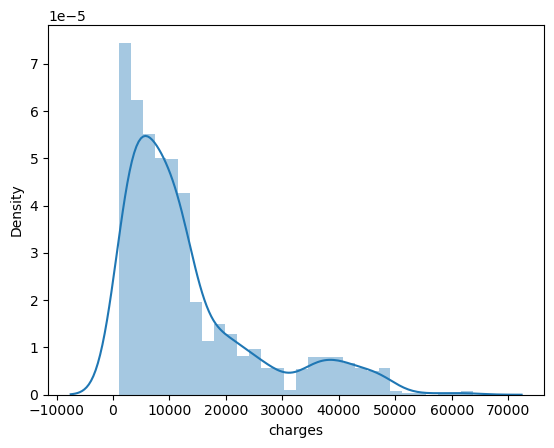

In [6]:
#charges distribution
sns.distplot(df['charges'])


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

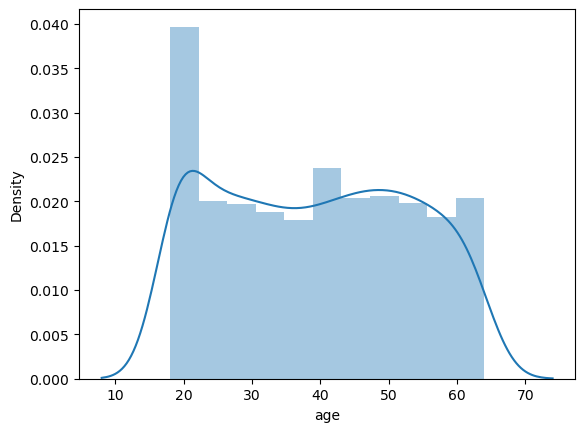

In [7]:
#age analysis
sns.distplot(df['age'])

d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

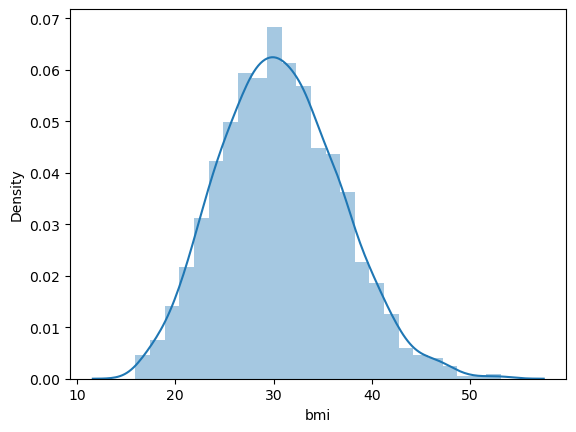

In [8]:
#bmi analysis
sns.distplot(df['bmi'])


<AxesSubplot:xlabel='age', ylabel='bmi'>

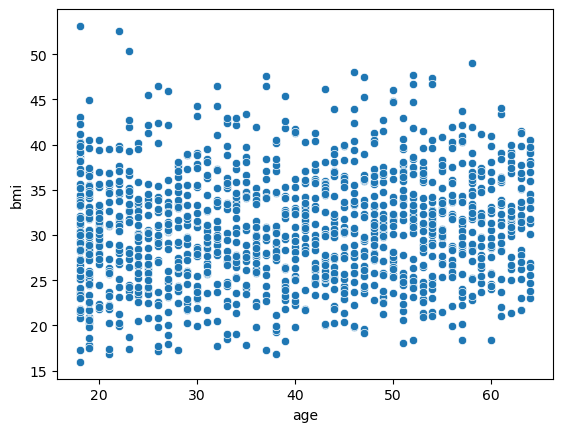

In [9]:
#correlation between age and bmi
sns.scatterplot(x='age', y='bmi', data=df)


<AxesSubplot:>

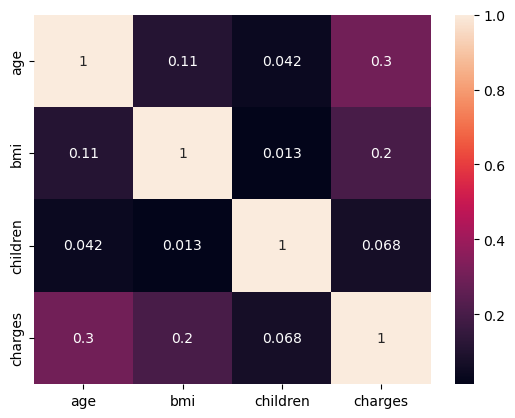

In [10]:
#correlation heatmap
sns.heatmap(df.corr(), annot=True)


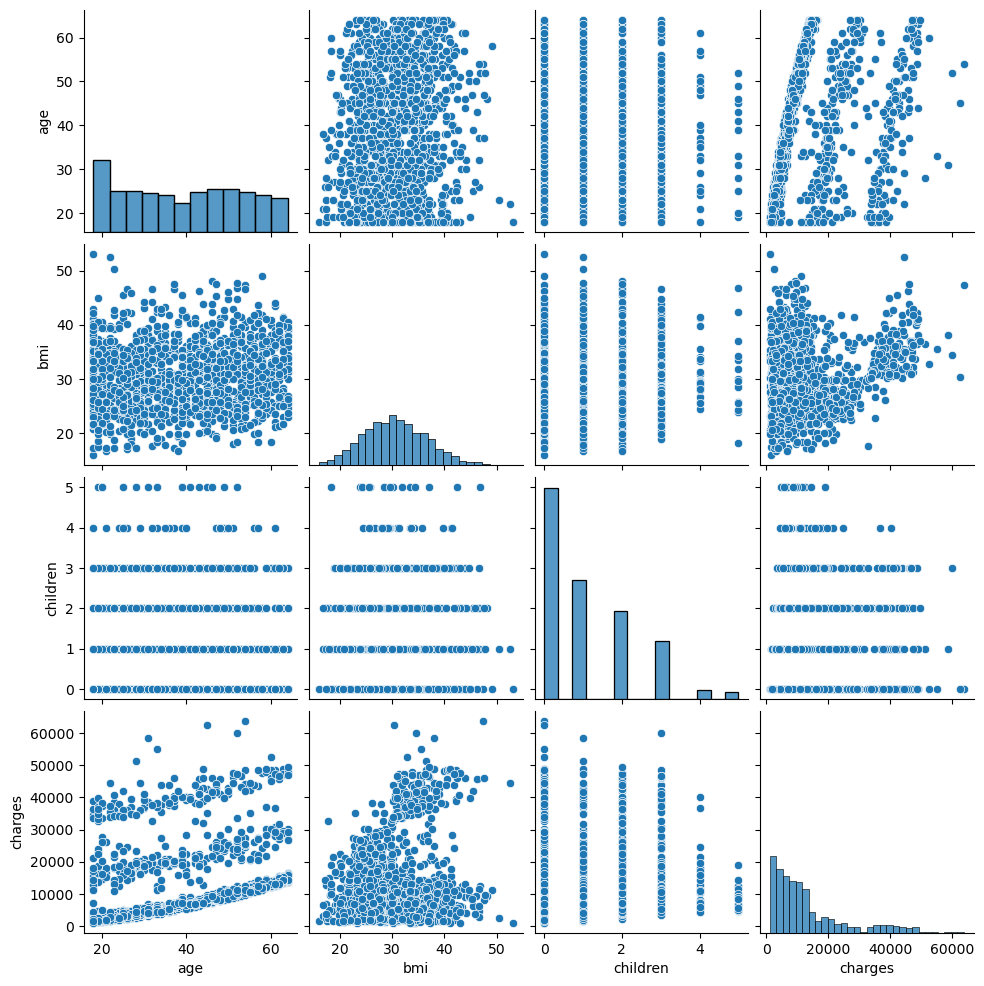

In [11]:
#pairplot
sns.pairplot(df)


d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

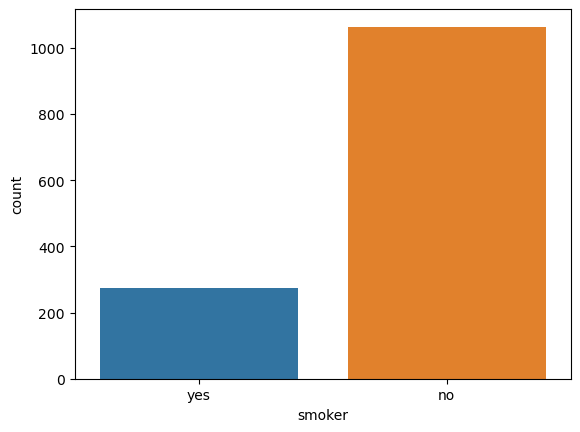

In [12]:
#smoker analysis
sns.countplot(df['smoker'])


<AxesSubplot:xlabel='smoker', ylabel='charges'>

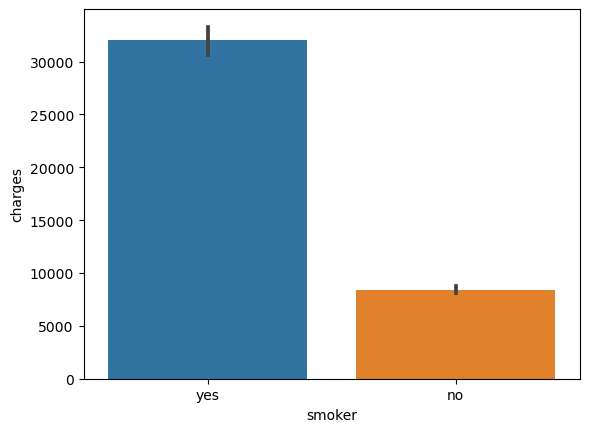

In [13]:
#smoker vs charges
sns.barplot(x='smoker', y='charges', data=df)


In [15]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)


In [16]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<AxesSubplot:>

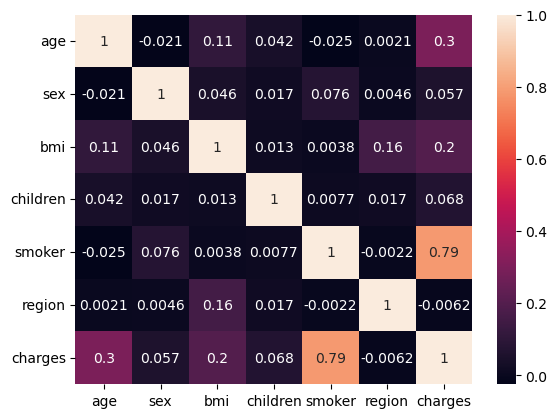

In [17]:
#corr heatmap
sns.heatmap(df.corr(), annot=True)


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


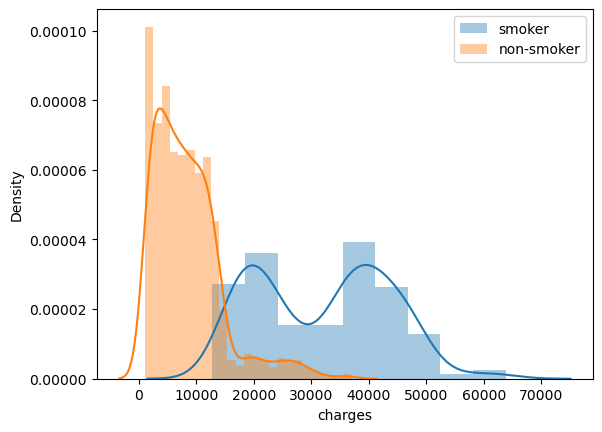

In [18]:
#distribution of charges for smokers and non-smokers
sns.distplot(df[df['smoker']==1]['charges'], label='smoker')
sns.distplot(df[df['smoker']==0]['charges'], label='non-smoker')
plt.legend()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


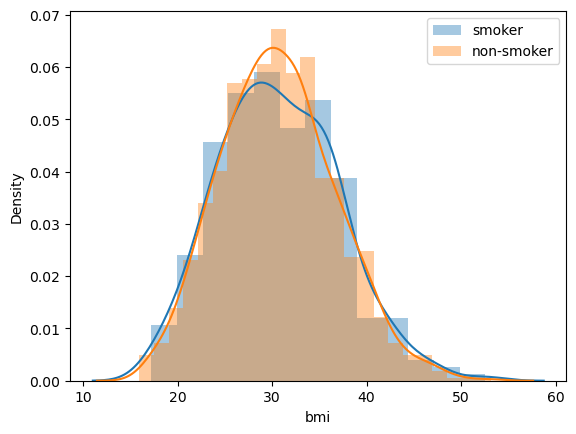

In [19]:
#distribution of bmi for smokers and non-smokers
sns.distplot(df[df['smoker']==1]['bmi'], label='smoker')
sns.distplot(df[df['smoker']==0]['bmi'], label='non-smoker')
plt.legend()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


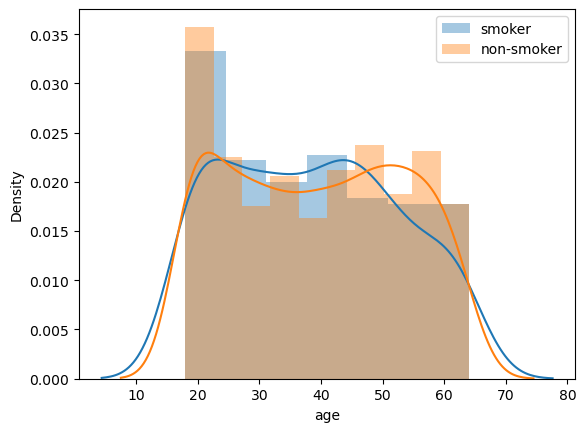

In [20]:
#distribution of age for smokers and non-smokers
sns.distplot(df[df['smoker']==1]['age'], label='smoker')
sns.distplot(df[df['smoker']==0]['age'], label='non-smoker')
plt.legend()

d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


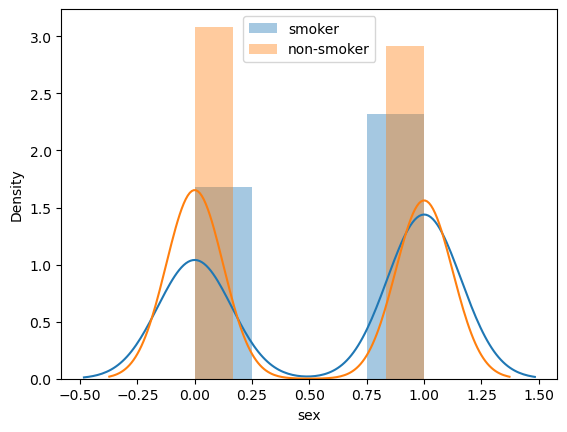

In [21]:
#distribution of sex for smokers and non-smokers
sns.distplot(df[df['smoker']==1]['sex'], label='smoker')
sns.distplot(df[df['smoker']==0]['sex'], label='non-smoker')
plt.legend()

<AxesSubplot:xlabel='smoker', ylabel='charges'>

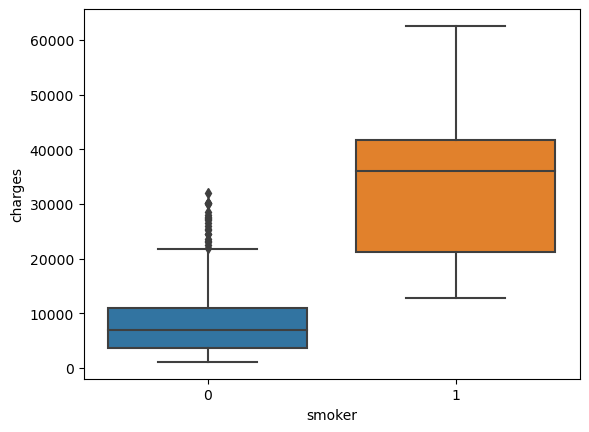

In [22]:
#box plot for charges for smoker and non smoker men
sns.boxplot(x='smoker', y='charges', data=df[df['sex']==1])


<AxesSubplot:xlabel='smoker', ylabel='charges'>

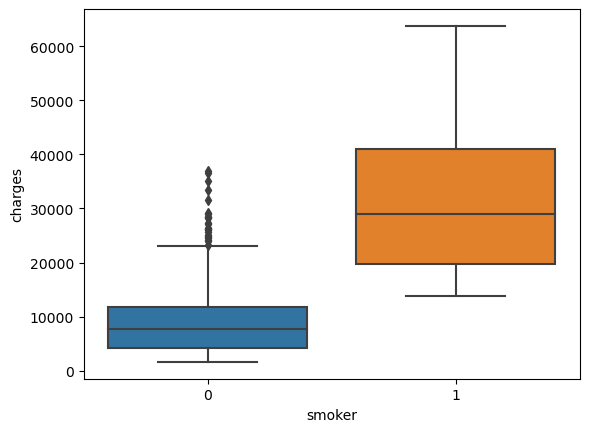

In [23]:
#box plot for charges for smoker and non smoker women
sns.boxplot(x='smoker', y='charges', data=df[df['sex']==0])

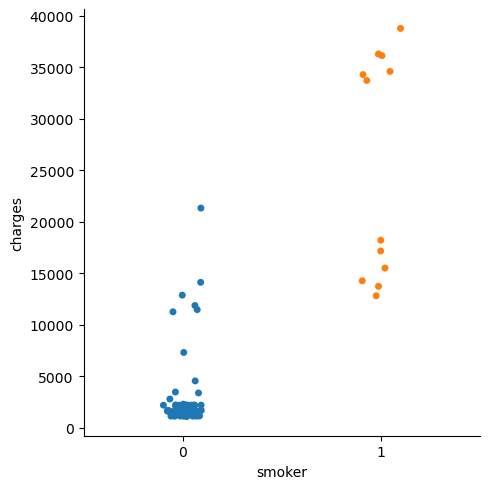

In [24]:
#cat plot for smoker and non smoker 18 year olds
sns.catplot(x='smoker', y='charges', data=df[df['age']==18])


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

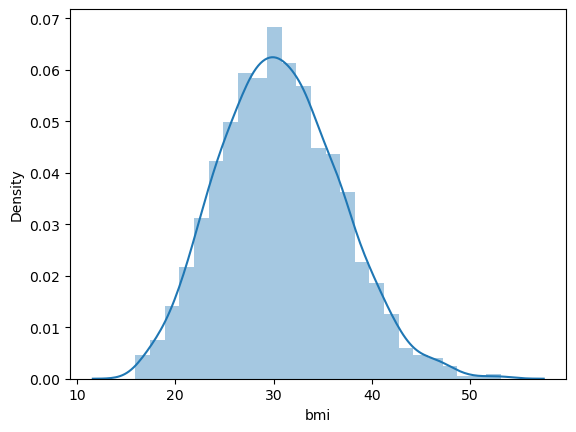

In [25]:
#bmi distribution
sns.distplot(df['bmi'])


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

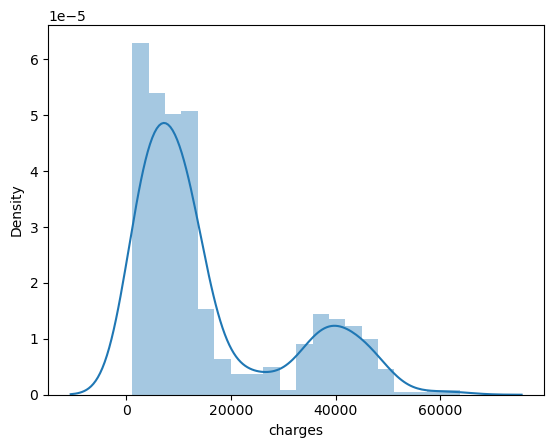

In [28]:
#charges distribution for people with bmi > 30
sns.distplot(df[df['bmi']>30]['charges'])

d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

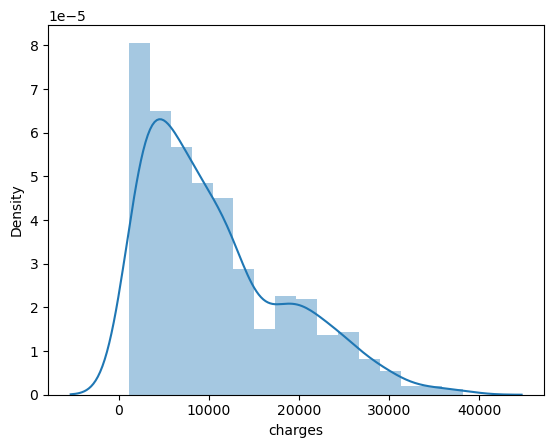

In [29]:
#charges distribution for people with bmi < 30
sns.distplot(df[df['bmi']<30]['charges'])


<AxesSubplot:xlabel='bmi', ylabel='charges'>

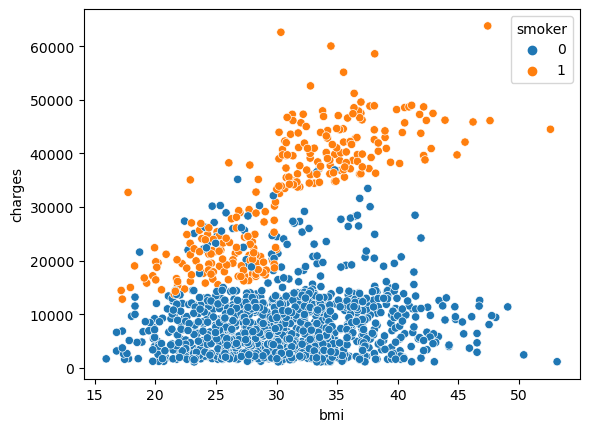

In [31]:
#scatter plot for bmi and charges for smokers and non smokers
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)


d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

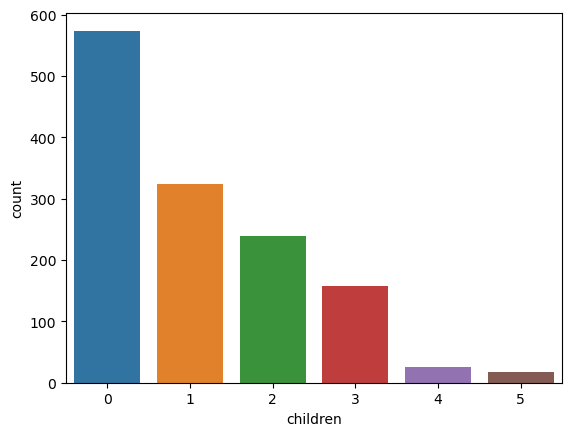

In [32]:
#children analysis
sns.countplot(df['children'])


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

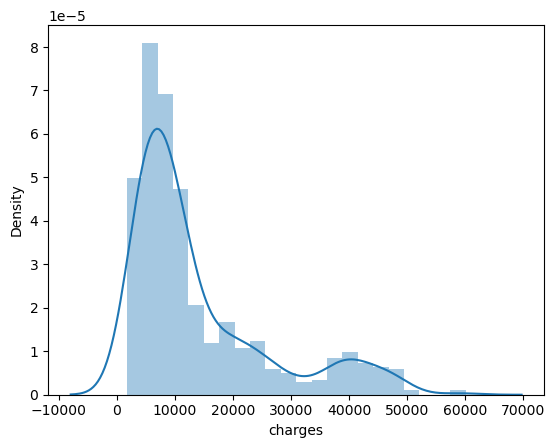

In [33]:
#charges distribution for people with children
sns.distplot(df[df['children']>0]['charges'])


In [34]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['charges'], axis=1)
y = df['charges']

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#creating a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

#predicting the test data
y_pred = lr.predict(X_test)

#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))


R2 score:  0.54856937482836
MSE:  40032357.93169866


In [42]:
print(lr.score(X_test,y_test))


0.54856937482836


In [43]:
#creating a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lr2 = LinearRegression()
lr2.fit(X_poly, y_train)
#predicting the test data
y_pred2 = lr2.predict(poly.fit_transform(X_test))
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred2))
print('MSE: ', mean_squared_error(y_test, y_pred2))


R2 score:  0.6817179086084129
MSE:  28224896.35255277


In [44]:
#creating a random forest regression model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
#predicting the test data
y_pred3 = rf.predict(X_test)
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred3))
print('MSE: ', mean_squared_error(y_test, y_pred3))


R2 score:  0.6865779385052769
MSE:  27793914.390892453


In [45]:
#creating a random forest regression model with 1000 estimators
rf2 = RandomForestRegressor(n_estimators=1000)
rf2.fit(X_train, y_train)
#predicting the test data
y_pred4 = rf2.predict(X_test)
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred4))
print('MSE: ', mean_squared_error(y_test, y_pred4))


R2 score:  0.6871902174261352
MSE:  27739618.187783696


In [46]:
#creating a random forest regression model with 1000 estimators and max depth of 5
rf3 = RandomForestRegressor(n_estimators=1000, max_depth=5)
rf3.fit(X_train, y_train)
#predicting the test data
y_pred5 = rf3.predict(X_test)
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred5))
print('MSE: ', mean_squared_error(y_test, y_pred5))


R2 score:  0.7075384049604145
MSE:  25935163.901316345


In [47]:
#creating a random forest regression model with 1000 estimators and max depth of 10
rf4 = RandomForestRegressor(n_estimators=1000, max_depth=10)
rf4.fit(X_train, y_train)
#predicting the test data
y_pred6 = rf4.predict(X_test)
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred6))
print('MSE: ', mean_squared_error(y_test, y_pred6))


R2 score:  0.6869690936226709
MSE:  27759227.196906935


In [ ]:
#